In [1]:
import os
from utils.monomer_utils import *
%load_ext autoreload
%autoreload 2

In [2]:
poly_dir = "./results/dev_test-1/task_3_repeat-5_25000_2.0_298.0k_gaff-2.11"
sdf_file = os.path.join(poly_dir, "init_chain.sdf")
psmiles_file = os.path.join(poly_dir, "psmiles.txt")
output_dir = os.path.join(poly_dir, "splits_template")
psmiles = ""
with open(psmiles_file,"r") as f:
    psmiles = f.readline()
matches = extract_repeat_units_from_sdf(sdf_file, psmiles, output_dir)
print(f"已导出 {len(matches)} 个 monomer 到 {output_dir}")


已导出 5 个 monomer 到 ./results/dev_test-1/task_3_repeat-5_25000_2.0_298.0k_gaff-2.11/splits_template


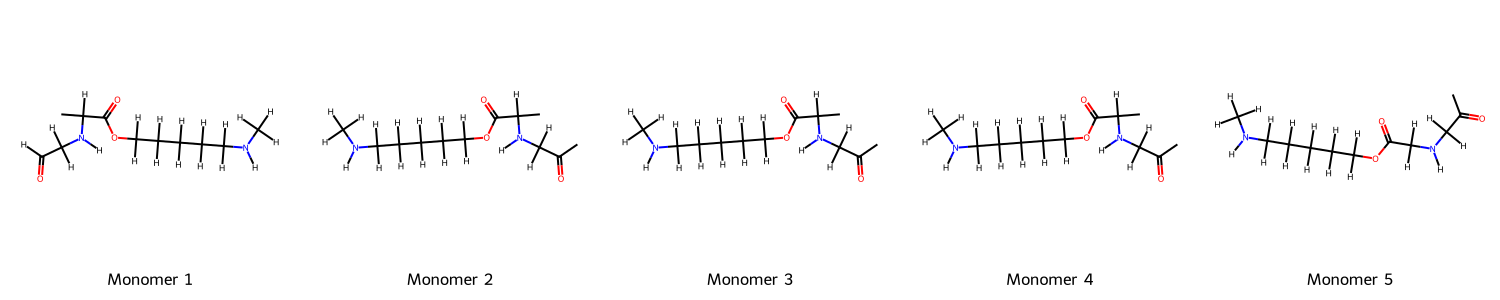

In [3]:
sdf_paths = sorted([
    os.path.join(output_dir, f) for f in os.listdir(output_dir)
    if f.endswith(".sdf")
])

# 可视化
img = visualize_monomer_sdf_grid(sdf_paths, mols_per_row=5)
img

In [4]:
def get_monomer_mols_from_dir(sdf_dir):
    paths = sorted([os.path.join(sdf_dir, f) for f in os.listdir(sdf_dir) if f.endswith(".sdf")])
    return [Chem.MolFromMolFile(p, removeHs=False) for p in paths]

monomer_mols = get_monomer_mols_from_dir(output_dir)
frames_path = os.path.join(poly_dir,"monomer_SE3_frames.json")
frames = extract_SE3_frames_from_monomers(monomer_mols, psmiles)
save_SE3_frames_to_json(frames, frames_path)

In [5]:
print(psmiles)

[*]C(=O)CNC([*])C(=O)OCCCCCNC


In [7]:
# 示例：加载分割的 monomer 并重建聚合物
monomer_mols = get_monomer_mols_from_dir(output_dir)

# 加载 SE3 frames
with open(frames_path, "r") as f:
    frames = json.load(f)

psmiles_list = [psmiles for _ in range(5)]
# bond_map 示例（根据需要设定）
bond_map = generate_bond_map_from_smiles(psmiles_list)
print(bond_map)


# 组合成聚合物
polymer = reconstruct_polymer_from_monomers(monomer_mols, frames, bond_map)

# 导出为 mol 文件
Chem.MolToMolFile(polymer, "reconstructed_polymer.mol")


[(6, 0), (6, 0), (6, 0), (6, 0)]


[07:12:14] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 301 in file /home/conda/feedstock_root/build_artifacts/rdkit-meta_1749209499913/work/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
----------
Stacktrace:
 0# Invar::Invariant::toString[abi:cxx11]() const in /home/anaconda3/envs/lpconf/lib/python3.10/site-packages/rdkit/../../../libRDKitRDGeneral.so.1
 1# Invar::operator<<(std::ostream&, Invar::Invariant const&) in /home/anaconda3/envs/lpconf/lib/python3.10/site-packages/rdkit/../../../libRDKitRDGeneral.so.1
 2# RDKit::Atom::getNumImplicitHs() const in /home/anaconda3/envs/lpconf/lib/python3.10/site-packages/rdkit/Chem/../../../../libRDKitGraphMol.so.1
 3# 0x00007F5157370EEA in /home/anaconda3/envs/lpconf/lib/python3.10/site-packages/rdkit/Chem/rdchem.so
 4# boost::python::objects::function::call(_object*, _object*) const in /home/anaconda3/envs/lpconf/lib/python3.10/site-packa

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 301 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2025.03.3
	BOOST: 
